In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from pandas_datareader import data as web

In [12]:
tickers = ["UVXY","^VIX","^GSPC","^TNX"]

In [13]:
df = pd.DataFrame()

In [14]:
for t in tickers:
    df[t] = web.DataReader(t, data_source="yahoo", start = "2010-1-1")["Adj Close"]

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2360 entries, 2011-10-04 to 2021-02-19
Data columns (total 4 columns):
UVXY     2360 non-null float64
^VIX     2360 non-null float64
^GSPC    2360 non-null float64
^TNX     2338 non-null float64
dtypes: float64(4)
memory usage: 92.2 KB


In [17]:
df.corr()

,UVXY,^VIX,^GSPC,^TNX
UVXY,1.000000,0.301747,-0.373224,-0.034935
^VIX,0.301747,1.000000,0.123578,-0.524469
^GSPC,-0.373224,0.123578,1.000000,-0.241021
^TNX,-0.034935,-0.524469,-0.241021,1.000000


### Getting Returns

In [21]:
returns = df.pct_change()

In [22]:
returns.columns = ["UVXY returns", "^VIX returns", "^GSPC returns","^TNX returns"]

In [23]:
df = pd.concat([df,returns], axis=1)

In [24]:
df

,UVXY,^VIX,^GSPC,^TNX,UVXY returns,^VIX returns,^GSPC returns,^TNX returns
Date,,,,,,,,
2011-10-04,2.058000e+08,40.820000,1123.949951,1.781,NaN,NaN,NaN,NaN
2011-10-05,1.813800e+08,37.810001,1144.030029,1.905,-0.118659,-0.073738,0.017866,0.069624
2011-10-06,1.740000e+08,36.270000,1164.969971,1.986,-0.040688,-0.040730,0.018304,0.042520
2011-10-07,1.765200e+08,36.200001,1155.459961,2.068,0.014483,-0.001930,-0.008163,0.041289
2011-10-10,1.559400e+08,33.020000,1194.890015,2.076,-0.116587,-0.087845,0.034125,0.003868
...,...,...,...,...,...,...,...,...
2021-02-12,9.420000e+00,19.969999,3934.830078,1.200,-0.049445,-0.060235,0.004711,0.036269
2021-02-16,9.560000e+00,21.459999,3932.590088,1.299,0.014862,0.074612,-0.000569,0.082500
2021-02-17,9.240000e+00,21.500000,3931.330078,1.301,-0.033473,0.001864,-0.000320,0.001540


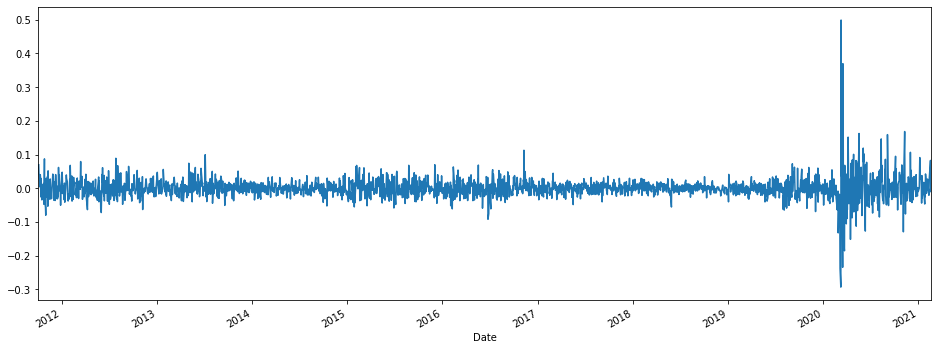

In [26]:
df["^TNX returns"].plot(figsize = (16,6))

In [27]:
df[df["^TNX returns"] * 100 > 45]

,UVXY,^VIX,^GSPC,^TNX,UVXY returns,^VIX returns,^GSPC returns,^TNX returns
Date,,,,,,,,
2020-03-10,40.450001,47.299999,2882.22998,0.748,-0.116233,-0.131473,0.049396,0.498998


In [29]:
df[df["^TNX returns"] * 100 < -28]

,UVXY,^VIX,^GSPC,^TNX,UVXY returns,^VIX returns,^GSPC returns,^TNX returns
Date,,,,,,,,
2020-03-09,45.77,54.459999,2746.560059,0.499,0.368311,0.298522,-0.07597,-0.293201


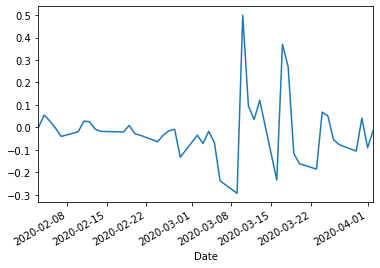

In [53]:
df.loc["2020-02-02":"2020-04-02"]["^TNX returns"].plot(kind = "line")

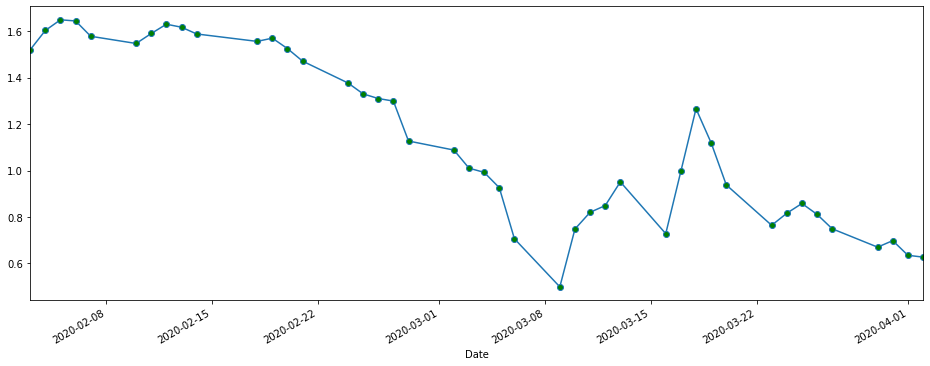

In [61]:
df.loc["2020-02-02":"2020-04-02"]["^TNX"].plot(kind = "line", figsize = (16,6), marker ="o", mfc = "g")

In [55]:
df.loc["2020-02-02":"2020-04-02"]["^TNX"].mean()

1.134790699149287

In [64]:
df.loc["2020-02-02":"2020-04-02"]["^GSPC returns"]

Date
2020-02-03    0.007255
2020-02-04    0.014980
2020-02-05    0.011251
2020-02-06    0.003326
2020-02-07   -0.005401
2020-02-10    0.007326
2020-02-11    0.001688
2020-02-12    0.006463
2020-02-13   -0.001630
2020-02-14    0.001844
2020-02-18   -0.002920
2020-02-19    0.004706
2020-02-20   -0.003816
2020-02-21   -0.010518
2020-02-24   -0.033514
2020-02-25   -0.030280
2020-02-26   -0.003779
2020-02-27   -0.044163
2020-02-28   -0.008238
2020-03-02    0.046039
2020-03-03   -0.028108
2020-03-04    0.042203
2020-03-05   -0.033922
2020-03-06   -0.017054
2020-03-09   -0.075970
2020-03-10    0.049396
2020-03-11   -0.048868
2020-03-12   -0.095113
2020-03-13    0.092871
2020-03-16   -0.119841
2020-03-17    0.059955
2020-03-18   -0.051831
2020-03-19    0.004708
2020-03-20   -0.043360
2020-03-23   -0.029294
2020-03-24    0.093828
2020-03-25    0.011535
2020-03-26    0.062414
2020-03-27   -0.033687
2020-03-30    0.033516
2020-03-31   -0.016013
2020-04-01   -0.044142
2020-04-02    0.022829
Name: 

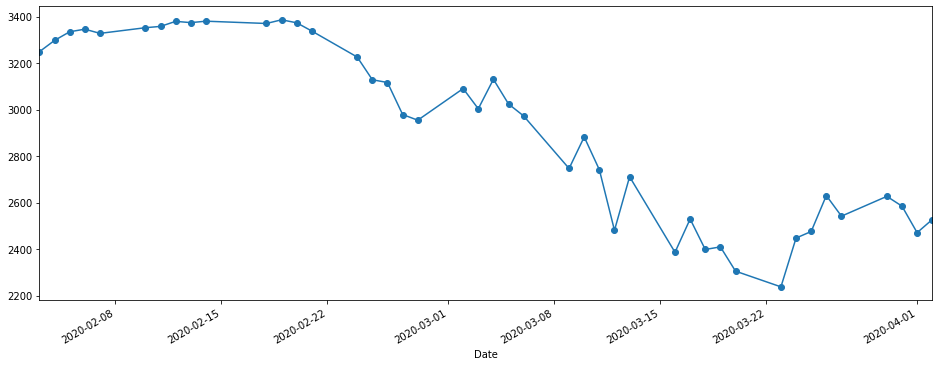

In [58]:
df.loc["2020-02-02":"2020-04-02"]["^GSPC"].plot(figsize = (16,6), marker = "o")

## S&P 

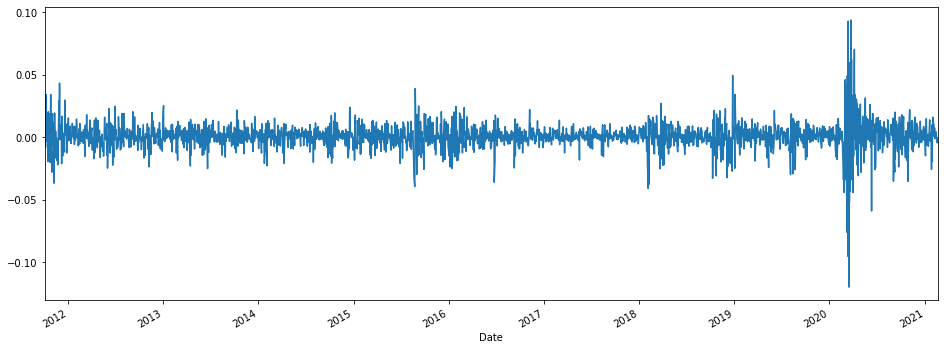

In [33]:
df['^GSPC returns'].plot(figsize = (16,6))

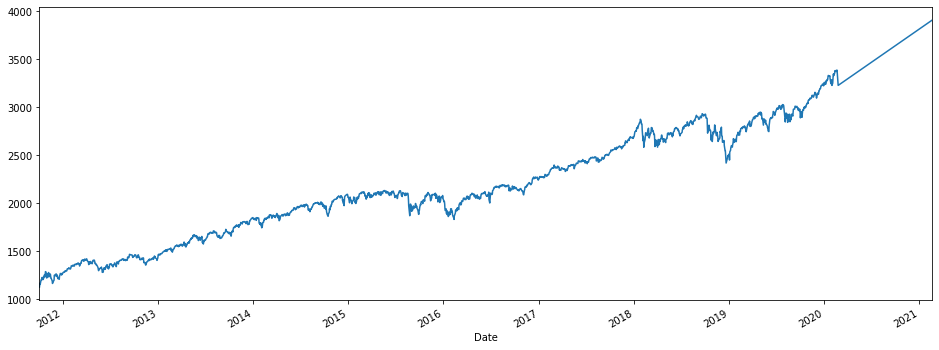

In [79]:
df[df["^TNX"] > 1.345]["^GSPC"].plot(figsize = (16,6))

In [86]:
df[df["^TNX"] > 2.545]["^GSPC returns"]

Date
2013-06-24   -0.012145
2013-06-25    0.009497
2013-07-05    0.010202
2013-07-08    0.005252
2013-07-09    0.007230
                ...   
2019-04-17   -0.002274
2019-04-18    0.001579
2019-04-22    0.001012
2019-04-23    0.008841
2019-05-02   -0.002124
Name: ^GSPC returns, Length: 550, dtype: float64

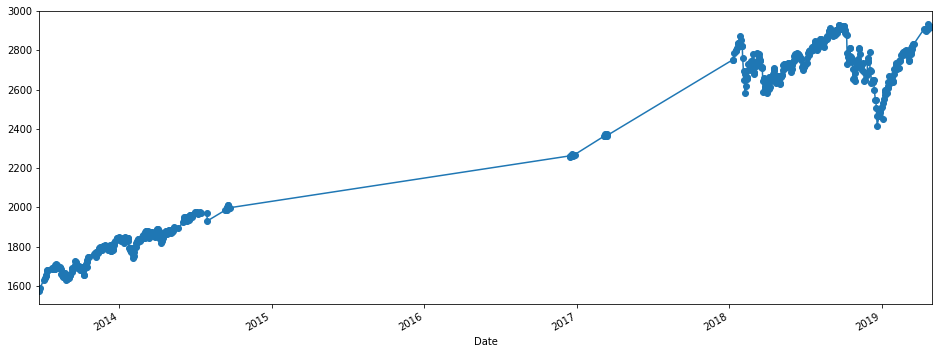

In [84]:
df[df["^TNX"] > 2.545]["^GSPC"].plot(figsize = (16,6), marker = "o")

In [104]:
df[df["^TNX"] > 3.045]["^TNX"].sort_values(ascending = False).head()

Date
2018-11-08    3.234
2018-10-08    3.233
2018-10-05    3.225
2018-10-10    3.225
2018-11-02    3.214
Name: ^TNX, dtype: float64

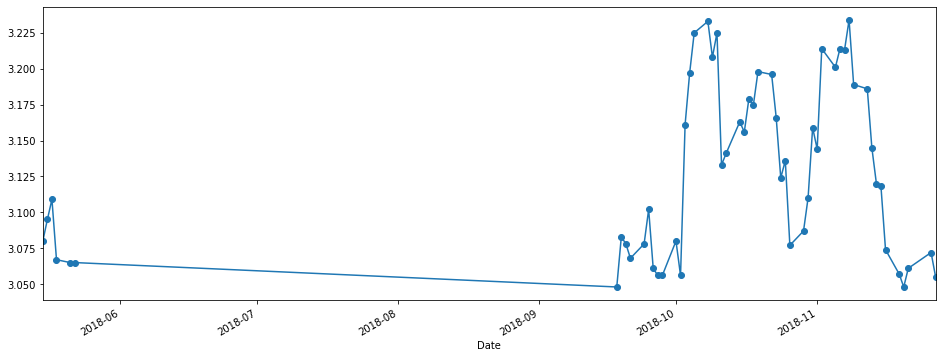

In [97]:
df[df["^TNX"] > 3.045]["^TNX"].plot(figsize = (16,6), marker = "o")

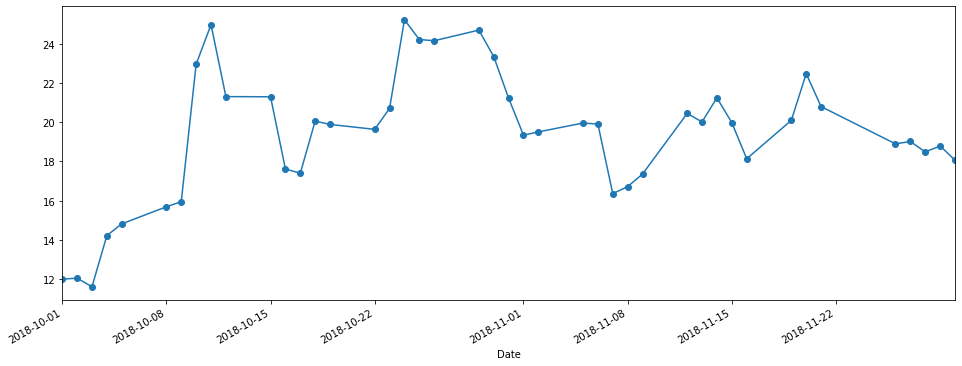

In [125]:
df[df["^TNX"] > 3]["^VIX"].loc["2018-10-1":].plot(figsize = (16,6), marker ="o")

In [133]:
(df[df["^TNX"] > 3]["^VIX returns"].loc["2018-10-1":].std()) * 252

28.24886326681117